In [ ]:
import sys
sys.path.insert(1, '..')

In [2]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

import evosax

from typing import NamedTuple
from functools import partial
import math

import xylo
import xylo.types as t
import xylo.woods
import xylo.cut

import xylo.receptance as r
import xylo.sweep as xs

import xylo.loss.receptance as xlr

In [10]:
import jax_cosmo.scipy.interpolate as interpolate
# import jax.scipy.interpolate as interpolate

In [122]:
bar = t.BarProps(width = 0.020, depth = 0.020, length = 0.400, elements = 100, min_depth = 0.010)

cut = jnp.array([1.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 1.0])

In [126]:
l = bar.length / bar.elements
bl2 = bar.length/2
x = jnp.linspace(-bl2 + l/2, bl2 - l/2, bar.elements)

xi = jnp.linspace(-bl2/2, bl2/2, len(cut))

cut_depth = bar.min_depth + cut * (bar.depth - bar.min_depth)

i = interpolate.InterpolatedUnivariateSpline(xi, cut_depth, k=2)
y = jnp.where(jnp.logical_and(x <= bl2/2, x >= -bl2/2), i(x), bar.depth)
y = jnp.maximum(jnp.minimum(y, bar.depth), bar.min_depth)

In [127]:
x, xi, cut

(Array([-0.198, -0.194, -0.19 , -0.186, -0.182, -0.178, -0.174, -0.17 ,
        -0.166, -0.162, -0.158, -0.154, -0.15 , -0.146, -0.142, -0.138,
        -0.134, -0.13 , -0.126, -0.122, -0.118, -0.114, -0.11 , -0.106,
        -0.102, -0.098, -0.094, -0.09 , -0.086, -0.082, -0.078, -0.074,
        -0.07 , -0.066, -0.062, -0.058, -0.054, -0.05 , -0.046, -0.042,
        -0.038, -0.034, -0.03 , -0.026, -0.022, -0.018, -0.014, -0.01 ,
        -0.006, -0.002,  0.002,  0.006,  0.01 ,  0.014,  0.018,  0.022,
         0.026,  0.03 ,  0.034,  0.038,  0.042,  0.046,  0.05 ,  0.054,
         0.058,  0.062,  0.066,  0.07 ,  0.074,  0.078,  0.082,  0.086,
         0.09 ,  0.094,  0.098,  0.102,  0.106,  0.11 ,  0.114,  0.118,
         0.122,  0.126,  0.13 ,  0.134,  0.138,  0.142,  0.146,  0.15 ,
         0.154,  0.158,  0.162,  0.166,  0.17 ,  0.174,  0.178,  0.182,
         0.186,  0.19 ,  0.194,  0.198], dtype=float64),
 Array([-0.1       , -0.07142857, -0.04285714, -0.01428571,  0.01428571,
      

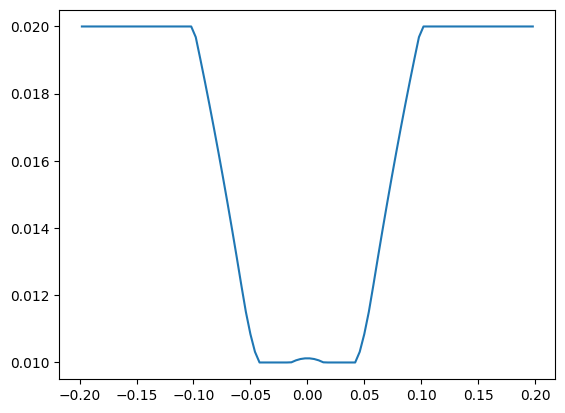

In [128]:
plt.plot(x, y)

In [50]:
x = jnp.array([-2, -1, 0, 1, 2])
y = jnp.array([0.0, 0.5, 1.2, 0.0, 1.0])
i = interpolate.InterpolatedUnivariateSpline(x, y, k=2)

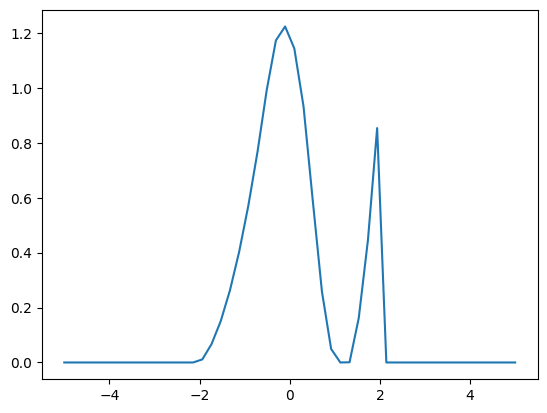

In [51]:
xx = jnp.linspace(-5, 5, 50)
yy = jnp.maximum(jnp.where(jnp.logical_and(xx > -2, xx < 2), i(xx), 0.0), 0.0)
plt.plot(xx, yy)

In [131]:

cut[0:-1], cut[-1]

(Array([1. , 0.5, 0. , 0. , 0. , 0. , 0.5], dtype=float64),
 Array(1., dtype=float64))